# Chapter 8 Matrix Algebra Overview

## Linear Algebra

In [1]:
import numpy as np

In [2]:
# identity matrix
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [3]:
np.ones((4,5))

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [4]:
b = np.arange(9)
print( b.shape )
print(b)
# c = np.arange(9)[:,np.newaxis]
# print(c.shape)
# print(c)
bb = np.array([b])
print(bb)
print(bb.shape)

(9,)
[0 1 2 3 4 5 6 7 8]
[[0 1 2 3 4 5 6 7 8]]
(1, 9)


In [5]:
A = np.arange(9).reshape(3,3)
A

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [6]:
np.diag(A)

array([0, 4, 8])

In [7]:
np.diag(np.diag(A))

array([[0, 0, 0],
       [0, 4, 0],
       [0, 0, 8]])

In [8]:
A = np.arange(4).reshape(2,2)
B = np.arange(4).reshape(2,2) + 1
print(A)
print(B)

[[0 1]
 [2 3]]
[[1 2]
 [3 4]]


In [9]:
print(A + B)
print(A - B/2)
print(A * B)  # matlab  *  matrix multiplication
print(A / B)

[[1 3]
 [5 7]]
[[-0.5  0. ]
 [ 0.5  1. ]]
[[ 0  2]
 [ 6 12]]
[[0.         0.5       ]
 [0.66666667 0.75      ]]


In [10]:
print(A)
print(B)

print( np.dot(A, B) ) 
print( A.dot(B) )
print(A @ B)
print(np.matmul(A, B))

# matlab A*B

[[0 1]
 [2 3]]
[[1 2]
 [3 4]]
[[ 3  4]
 [11 16]]
[[ 3  4]
 [11 16]]
[[ 3  4]
 [11 16]]
[[ 3  4]
 [11 16]]


In [11]:
A = np.arange(16).reshape(4,4)
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [12]:
np.trace(A)

30

In [13]:
# determinant
A = (np.arange(4) + 1).reshape(2,2)
A

array([[1, 2],
       [3, 4]])

In [14]:
np.linalg.det(A) # linear algebra

-2.0000000000000004

In [15]:
B = np.linalg.inv(A)  # inverse matrix  A @ A^(-1) = I
B

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [16]:
np.dot(A, B), A @ B

(array([[1.00000000e+00, 1.11022302e-16],
        [0.00000000e+00, 1.00000000e+00]]),
 array([[1.00000000e+00, 1.11022302e-16],
        [0.00000000e+00, 1.00000000e+00]]))

In [17]:
# linear matrix equation     A x = b

#     4 x1 + 3 x2 = 23
#     3 x1 + 2 x2 = 16

A = np.array([[4,3],[3,2]])
b = np.array([23, 16])

x = np.linalg.solve(A, b)   # matlab x = A \ b
print(x)

# gauss elimination 

[2. 5.]


In [18]:
np.dot(A, x) - b

array([0., 0.])

### Example 8.2

In [19]:
# A x = b
A = np.array([[150, -100, 0], 
              [-100, 150, -50],
              [0, -50, 50]])
b = np.array([588.6, 686.7, 784.8])

In [20]:
A, b

(array([[ 150, -100,    0],
        [-100,  150,  -50],
        [   0,  -50,   50]]),
 array([588.6, 686.7, 784.8]))

In [21]:
x = np.linalg.solve(A, b)
print(x)

[41.202 55.917 71.613]


### Case Study 8-3, Kirchoff's law

$$ i_2 ( R_2 + R_3 + R_4 ) + (i_2 - i_1) R_6 = 0 $$
$$ i_1 (R_1 + R_5) + (i_1 - i_2 ) R_6 = E $$

$$
  \begin{bmatrix} 
    -R_6  &  
    R_2 + R_3 + R_4 + R_6 \\
    R_1 + R_5 + R_6  & 
    -R_6
  \end{bmatrix}  
  \left[ 
  \begin{array}{c} 
    i_1 \\
    i_2 
  \end{array}   \right]
 = 
 \left[ 
  \begin{array}{c} 
    0 \\
    E 
  \end{array}   \right]
 $$

In [22]:
E = 200
R1, R2, R3, R4, R5, R6 = [5, 10, 5, 15, 20, 10]

A = np.array([[         -R6, R2 + R3 + R4 + R6],
              [R1 + R5 + R6,               -R6]])
b = np.array([0, E])
i = np.linalg.solve(A, b)
i

array([6.15384615, 1.53846154])

$$ i_1 + i_2 + i_6 = 0 $$
$$ -i_2 + i_3 = 0 $$
$$ -i_3 + i_4 = 0 $$
$$ -i_4 + i_5 - i_6 = 0 $$

$$ i_1 R_1 - i_6 R_6 - i_5 R_5 = 200 $$
$$ -i_2 R_2 - i_3 R_3 - i_4 R_4 + i_6 R_6 = 0 $$

In [23]:
A = np.array([[   1,     1,     0,     0,     0,     1],
              [   0,    -1,     1,     0,     0,     0],
              [   0,     0,    -1,     1,     0,     0],
              [   0,     0,     0,    -1,     1,    -1],
              [  R1,     0,     0,     0,   -R5,   -R6],
              [   0,   -R2,   -R3,   -R4,     0,    R6]])
b = np.array([0, 0, 0, 0, 200, 0])
i = np.linalg.solve(A, b)
i

array([ 6.15384615, -1.53846154, -1.53846154, -1.53846154, -6.15384615,
       -4.61538462])

### problem 8-15

In [24]:
R = [35, 30, 8, 15, 5, 7, 10]
A = [[R[0] + R[6] + R[4],              -R[6],              0],
     [             -R[6], R[1] + R[5] + R[6],          -R[5]],
     [                 0,              -R[5], R[2]+R[3]+R[5]]]
b = [-120, 0, 0]
i = np.linalg.solve(A, b)
i

array([-2.51068409, -0.55342045, -0.12913144])

 ### problem 8-16

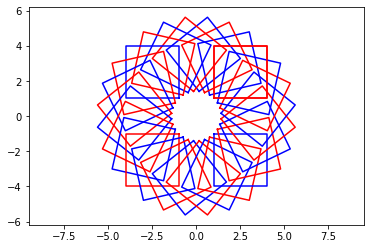

In [27]:
def rotation2d(td, x, y):
    t = td/180*np.pi
    c = np.cos(t)
    s = np.sin(t)
    T = np.array([[c, -s], [s, c]])
    return np.dot(T, np.vstack([x, y]))

def plott(x, y, b):
    plt.plot(np.r_[x, x[0]], np.r_[y, y[0]], b)
    return
    
import matplotlib.pyplot as plt

x = [1, 4, 4, 1]
y = [1, 1, 4, 4]

f = -1
for t in np.linspace(0, 360, 29):    
    xr, yr = rotation2d(t, x, y)
    b = 'r' if f < 0 else 'b'
    f = -f
    plott(xr, yr, b)
plt.axis('equal')
plt.show()